In [49]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np


mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [50]:
## file 불러옴
data = pd.read_excel('./1920 통합.xlsx')
data.head()

,청구서번호,No.,Subject,Machinery,Assembly,청구품목,Part No.1,Part No.2,청구량,견적,...,발주처,발주,발주수량,발주금액,D/T,미입고 기간,창고입고,창고입고수량,입고창고,리드타임
0,COK-BS-DSP-1901004,1,COK-F-DECK-190104-01,CARGO BOOM VANG BLOCK (STBD 하),BLOCK,"MCKISSICK CONSTRUCTION BLOCKS (WIRE SIZE : 5/8"")",C15S10BS,2103170,2.0,2019-01-11,...,MATSUI(U.S.A) COROPRATION,2019-01-11,2.0,2.288732e+06,56,NaN,2019-05-03,2,BW,112
1,COK-BS-DSP-1901004,2,COK-F-DECK-190104-01,SPANISH BOOM VANG BLOCK (PORT 상),BLOCK,"MCKISSICK CONSTRUCTION BLOCKS (WIRE SIZE : 5/8"")",C15D10BS,2103180,1.0,2019-01-11,...,MATSUI(U.S.A) COROPRATION,2019-01-11,1.0,1.917750e+06,56,NaN,2019-04-18,1,BW,97
2,COK-BS-DSP-1901004,3,COK-F-DECK-190104-01,PURSE BLOCK,TOW BLOCK,WESTEC 20TON TOW BLOCK,WESTEC 20TON TOW BLOCK,NaN,1.0,2019-01-11,...,MATSUI(U.S.A) COROPRATION,2019-01-11,1.0,6.538572e+06,56,NaN,2019-05-03,1,BW,112
3,COK-BS-DSP-1905036,1,폰페이 재고정정,MAIN ENGINE,POWER PACK AS,GE POWER PACK FORK - E7(B),40028340,NaN,8.0,2019-04-01,...,MATSUI(U.S.A) COROPRATION,2019-04-01,8.0,3.680000e+07,60,NaN,2019-04-01,8,PN,0
4,COK-BS-DSP-1905036,2,폰페이 재고정정,MAIN ENGINE,POWER PACK AS,GE POWER PACK FORK - E7(B),40028340,NaN,8.0,2019-04-01,...,MATSUI(U.S.A) COROPRATION,2019-04-01,8.0,3.680000e+07,60,NaN,2019-04-01,8,PN,0


In [51]:
type(data)

pandas.core.frame.DataFrame

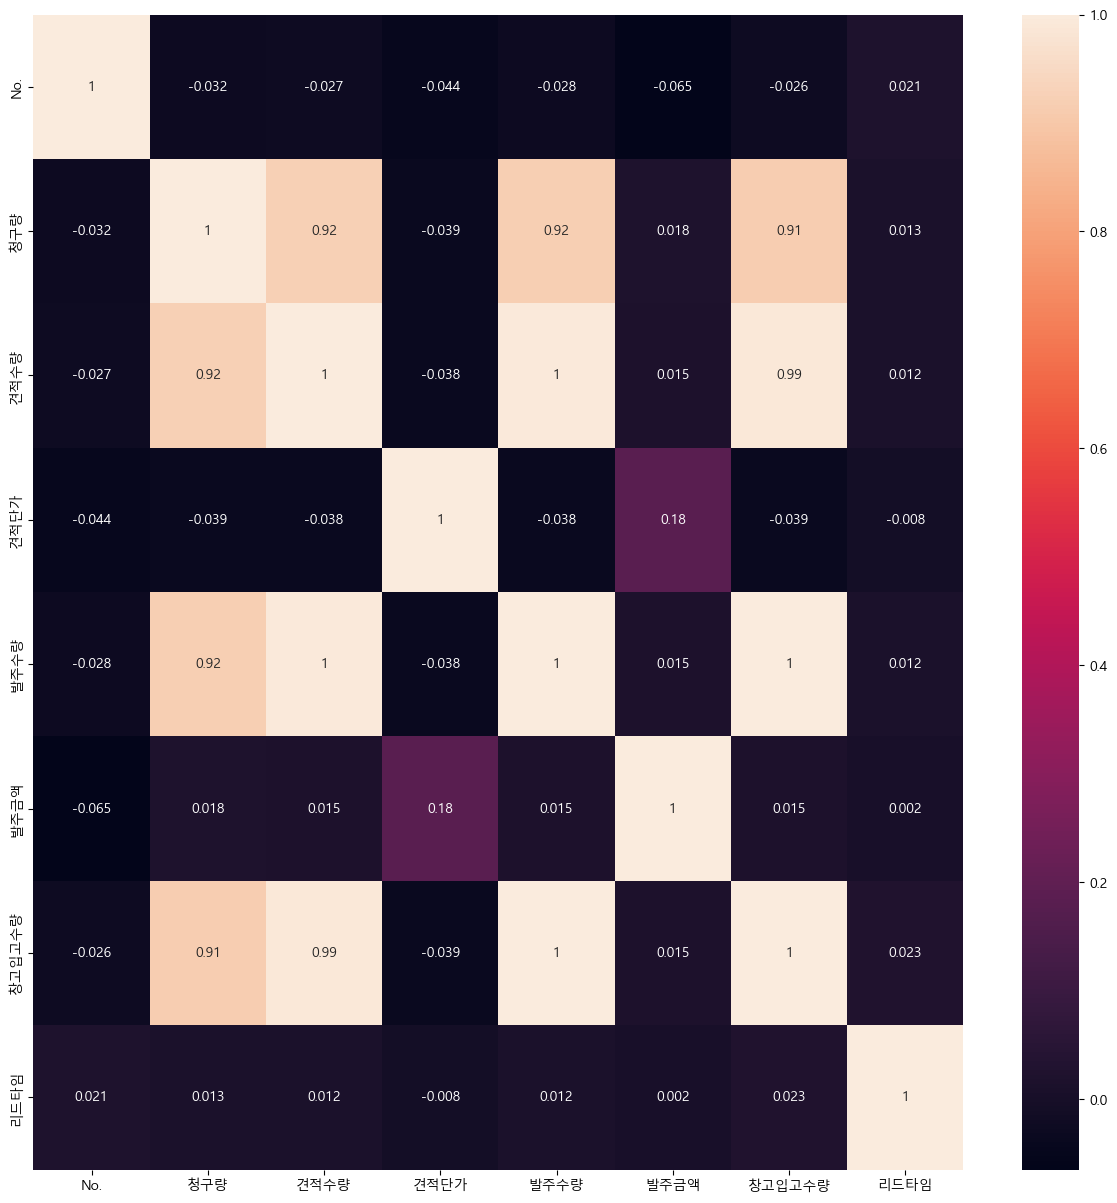

In [52]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [53]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

train = pd.DataFrame(data)
type(train)

pandas.core.frame.DataFrame

In [55]:
train['Machinery_Encode']= label_encoder.fit_transform(train['Machinery'])
train['Assembly_Encode']= label_encoder.fit_transform(train['Assembly'])
train['청구품목_Encode']= label_encoder.fit_transform(train['청구품목'])
train['part1_Encode']= label_encoder.fit_transform(train['Part No.1'])
train['견적_Encode']= label_encoder.fit_transform(train['견적'])
train['part1_Encode']= label_encoder.fit_transform(train['Part No.1'])
train['견적화폐_Encode']= label_encoder.fit_transform(train['견적화폐'])
train['발주번호_Encode']= label_encoder.fit_transform(train['발주번호'])
train['견적단가_Encode']= label_encoder.fit_transform(train['견적단가'])
train['발주처_Encode']= label_encoder.fit_transform(train['발주처'])
train['발주_Encode']= label_encoder.fit_transform(train['발주'])
train['발주금액_Encode']= label_encoder.fit_transform(train['발주금액'])
train['미입고 기간_Encode']= label_encoder.fit_transform(train['미입고 기간'])
train['창고입고_Encode']= label_encoder.fit_transform(train['창고입고'])
train['입고창고_Encode']= label_encoder.fit_transform(train['입고창고'])





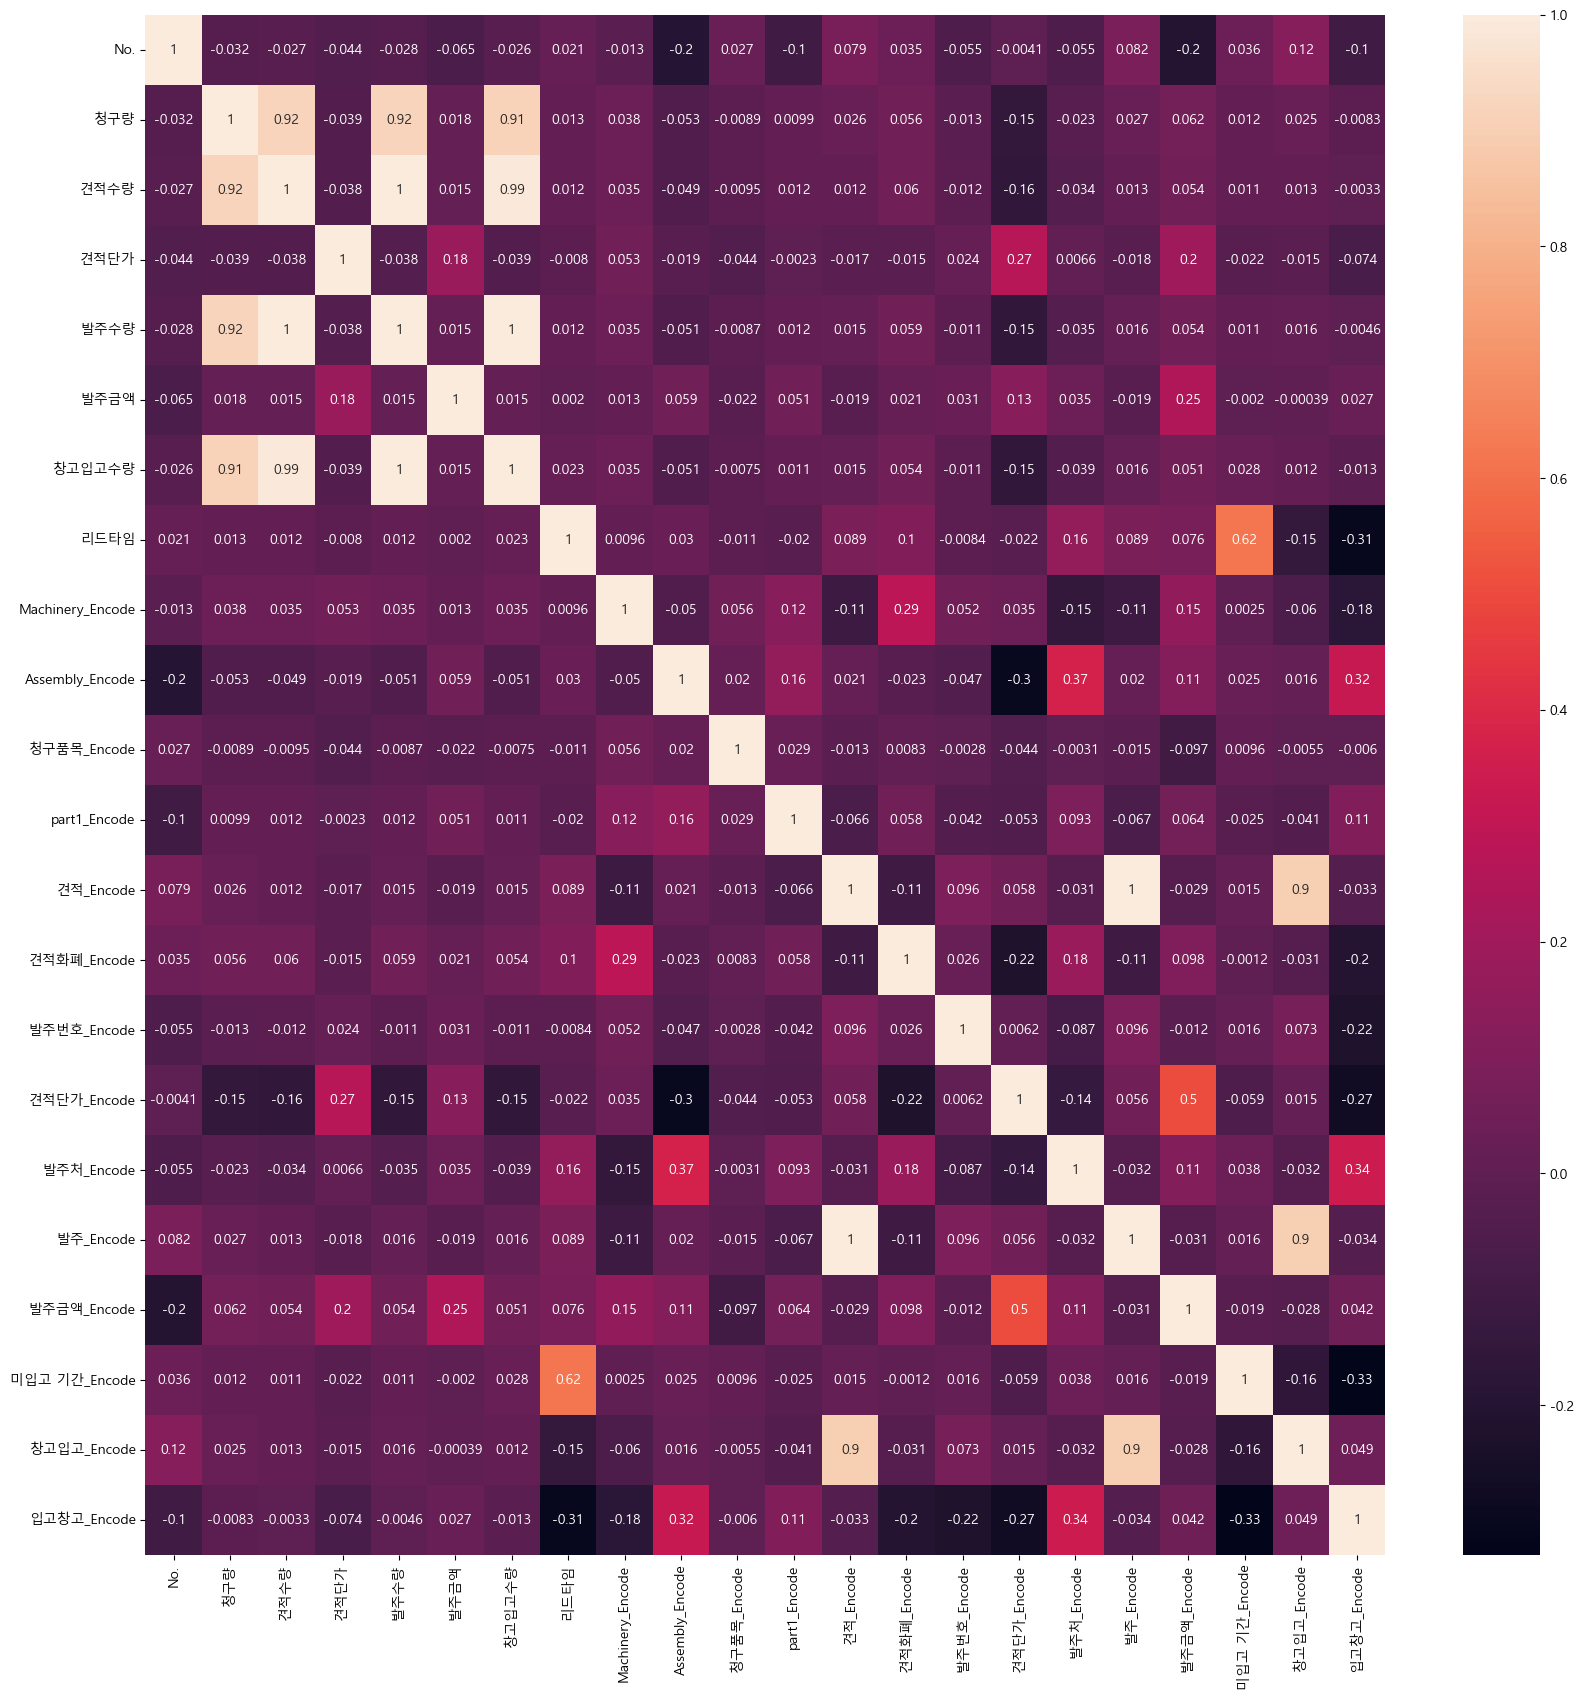

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [43]:
train.columns

Index(['청구서번호', 'No.', 'Subject', 'Machinery', 'Assembly', '청구품목', 'Part No.1',
       'Part No.2', '청구량', '견적', '견적수량', '견적화폐', '견적단가', '발주번호', '발주처', '발주',
       '발주수량', '발주금액', 'D/T', '미입고 기간', '창고입고', '창고입고수량', '입고창고', '리드타임',
       'Machinery_Encode', 'Assembly_Encode', '청구품목_Encode', 'part1_Encode',
       '견적_Encode', '견적화폐_Encode', '발주번호_Encode', '견적단가_Encode', '발주처_Encode',
       '발주_Encode', '발주금액_Encode', '미입고 기간_Encode', '창고입고_Encode',
       '입고창고_Encode'],
      dtype='object')

In [82]:
## 청구품목 중복 제거 후 excel파일로 출력
lt = list(data['청구품목'].unique())

pd.DataFrame(lt).to_excel('청구품목.xlsx')